## 방법

1. 카카오톡 대화방에서 가장 친한 친구 또는 가장 많이 대화한 친구 1명 대화 내용을 다운로드 받아주세요.
    * 윈도우 pc 기준으로 [대화방] -> [설정] -> [대화 내용] -> [대화 내보내기] 단계로 다운로드 받아주세요.
    * mac에서 금지 (저장되는 형식이 다름)
2. 저장된 친구 이름으로 txt를 저장해주세요. (ex) 성록교수님짱짱.txt
3. 친구 이름을 순서대로 입력하여주세요.
    * 중복 된 친구 이름은 오류 발생
4. 평소에 자신이 욕 대신 사용하는 단어를 적어주세요. (ex) 시발 => 시방
    * 한 단어씩 입력하고 enter를 눌러주세요.
    * 더 이상 없는 경우 아무 것도 작성하지 않고 enter를 눌러주세요.


## 주의사항

1. 개인정보 보호 처리가 되어 있지 않습니다.
    * 주소, 계좌, 비밀번호 등 유출되지 않게 조심하세요.
    * 어떠한 데이터도 수집되지 않음.
2. hanspell 라이브러리를 사용하여 오타가 아닌 부분이 자동으로 수정되어 있을 수 있습니다.
    * 주로 사람 이름을 불렀을 경우 수정될 수 있습니다.
    * hanspell 라이브러리에 예외 사항으로 걸리는 경우 맞춤법 처리가 되지 않아 오류 데이터가 될 수 있습니다.
3. 너무 긴 대화는 시간이 매우 오래 걸립니다.
    * 2018년부터 2022년까지 모아온 자료를 돌려보았을 때 10분 이상 소요되는 것으로 보였습니다~
    * 긴 파일들은 10000개의 대화 기준으로 자르도록 하겠습니다. 10000개 기준 약 340초 소요

In [30]:
# 모든 import

import time
from IPython.display import Image

from hanspell import spell_checker

from khaiii import KhaiiiApi
from konlpy.tag import Twitter, Kkma, Komoran

from collections import Counter
from wordcloud import WordCloud

In [85]:
# 주요 변수들 모음

friends_name = ''
my_name = ''
file = ''
my_explicits = []


lines = '' # 친구와의 카톡에 모든 대화 (전처리 과정 없음)
line = [] # 대화 내용을 포함한 라인의 list (년도 미포함, 부가 정보 미포함)

all_text = [] # 전처리 과정 이후 카톡의 모든 대화
my_text = [] # 전처리 과정 이후 내가 보낸 대화
friend_text = [] # 전처리 과정 이후 친구가 보낸 대화

In [86]:
friends_name = input('친구의 카톡 닉네임을 입력하여 주세요 : ')

my_name = input('자신의 카톡 닉네임을 입력하여 주세요 : ')

친구의 카톡 닉네임을 입력하여 주세요 : 홍정아
자신의 카톡 닉네임을 입력하여 주세요 : 마경미


In [87]:
file = friends_name+'.txt'

In [88]:
print("평소에 사용하는 비속어를 적어주세요. 없을 경우 '없음'을 입력하여 주세요.")
while True:
    temp = input()
    if temp == '없음':
        break
    my_explicits.append(temp)

평소에 사용하는 비속어를 적어주세요. 없을 경우 '없음'을 입력하여 주세요.
없음


In [89]:
with open(file, 'r', encoding="utf-8") as f:
    lines = f.readlines()

In [6]:
line = [line for line in lines if '] [' in line]

start = time.time() 
for value in line[:10000]:
    split_value = value.split('] ')
    split_value[2] = split_value[2].replace('사진\n', '').replace('이모티콘\n','').replace(
        '삭제된 메세지입니다', '').replace('ㅋ','').replace('ㅠ','').replace('ㅌ','')
    
    # 특수문자 제거
    split_value[2] = ''.join(char for char in split_value[2] if char.isalnum())

    if split_value[2] == '':
        continue
    try:
        split_value[2] = spell_checker.check([split_value[2]])[0].checked
    except Exception as e:
        print('예외 발생',split_value[2])
    
    all_text.append(split_value[2])
    if split_value[0] in friends_name[0]:
        friend_text.append(split_value[2])
    else:
        my_text.append(split_value[2])

print("time :", time.time() - start)

예외 발생 ㄱㅊ
예외 발생 ㅜㅜㅜㅇ
time : 365.1182630062103


In [38]:
# 카카오톡 khaiii 사용해보기
from khaiii import KhaiiiApi


my_text_analyzed = []
api = KhaiiiApi()

for sentence in my_text:
    analyzed = api.analyze(sentence)
    for word in analyzed:
        for morph in word.morphs:
            if morph.tag == 'NNP'or morph.tag == 'NNG':
                my_text_analyzed.append(morph.lex)
                

# 가장 많이 나온 단어 40개를 저장

counts = Counter(my_text_analyzed)
tags = counts.most_common(40)

my_text_analyzed = set(my_text_analyzed)
my_text_analyzed_list = list(my_text_analyzed)
for value in my_text_analyzed_list:
    if len(value) == 1:
        my_text_analyzed.discard(value)
    if value[0]*len(value) == value :
        my_text_analyzed.discard(value)

In [23]:
# khaiii를 통한 WordCloud 생성

wc = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file('khaiii_my.jpg')

In [50]:
# Kkma를 사용해보기
my_text_analyzed_Komoran = []

komoran = Komoran()

In [57]:
for sentence in my_text:
    my_text_analyzed_Komoran.extend(komoran.nouns(sentence))

my_text_analyzed_Komoran = [n for n in my_text_analyzed_Komoran if len(n) > 1]
counts= Counter(my_text_analyzed_Komoran)
tags = counts.most_common(40)
    
wc = WordCloud(font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf",background_color="white",width=600,height=400)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file("Komoran_my.png")

In [ ]:
# 일반 카톡 대화 내용 word cloud
from wordcloud import WordCloud

wc = WordCloud(font_path='/Library/Fonts/NanumBarunGothic.ttf', background_color="white", width=600, height=400)
wc.generate(my_text)
wc.to_file("result.png")

In [ ]:
# 배경 이미지 선택

from PIL import Image
import numpy as np
 
im = Image.open('heart.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

wordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(dic)

plt.figure(figsize = (6, 6))  
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)

plt.axis('off')

plt.show()

# 모든 입력

1. 친구 이름
2. 평소에 자기가 사용하는 비속어

## 모든 결과 출력하기
1. 자연어 처리 하지 않은 wordCloud 이미지
2. 자연어 처리 한 wordCloud 이미지
3. 자신이 사용한 비속어 wordCloud 이미지
4. 친구가 사용한 비속어 wordCloud 이미지
5. 자신이 사용한 비속어 횟수에 대한 보고서 출력

* 친구는 삭제할지 고민 중!


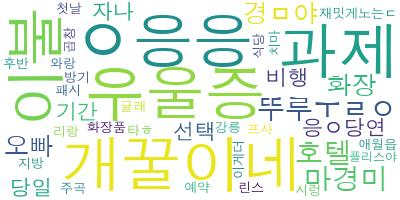

In [60]:
Image("khaiii_friend1.jpg")

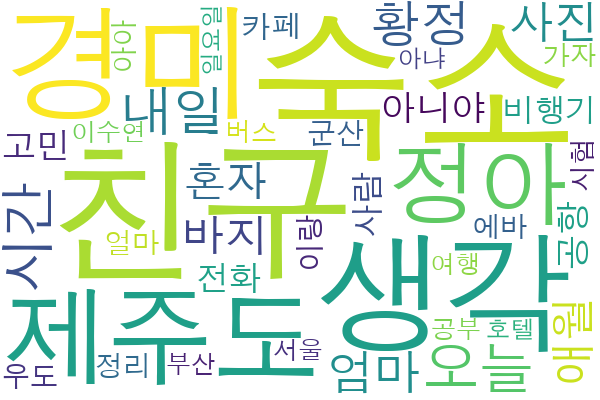

In [61]:
Image("Komoran_my.png")